### 這個工作的目標是在不斷變化的台股市場中尋找穩定獲利的不變策略。策略名稱取自《易經》，以表徵市場的盤勢發展，並協助投資者趨吉避凶。



In [22]:
import datetime

from dateutil.relativedelta import relativedelta

from stock_tw.變易 import util, dataset

dataset.datatime_range

{'max_price': Timestamp('2023-07-03 00:00:00'),
 'max_pera': Timestamp('2023-12-31 00:00:00'),
 'max_revenue': Timestamp('2023-07-10 00:00:00'),
 'max_fin_stmt': Timestamp('2023-05-15 00:00:00'),
 'min_price': Timestamp('2023-06-29 00:00:00'),
 'min_pera': Timestamp('2005-12-31 00:00:00'),
 'min_revenue': Timestamp('2018-02-10 00:00:00'),
 'min_fin_stmt': Timestamp('2019-05-15 00:00:00')}

# 不易：元亨利貞

In [23]:
df = dataset.analyze_profit()
df = dataset.append_stock_info(df)
df.iloc[:,0:22].head(5).round(2)

,name,group,收盤價,漲跌幅(%),殖利率(%),股利年度,股利連續N年,本益比,股價淨值比,EPS,...,E(Sum),E(Avg),E(Std),E(0),E(1),E(2),E(3),外%(0),外%(1),外%(2)
code,,,,,,,,,,,,,,,,,,,,,
1101,台泥,水泥工業,38.25,0.52,1.31,111.0,5,50.07,1.27,0.76,...,0.76,0.19,0.16,0.20,0.36,0.22,-0.02,130.74,56.51,90.06
1102,亞泥,水泥工業,44.60,0.45,5.18,111.0,5,12.94,1.01,3.68,...,3.68,0.92,0.55,0.81,0.19,1.33,1.35,62.32,-5.82,68.77
1103,嘉泥,水泥工業,21.80,1.38,2.33,111.0,5,NaN,0.62,-0.13,...,-0.13,-0.03,0.43,0.03,0.05,0.41,-0.62,315.70,319.48,144.23
1104,環泥,水泥工業,31.15,1.44,5.86,111.0,5,11.29,0.94,2.72,...,2.72,0.68,0.25,0.42,0.92,0.87,0.51,43.41,71.18,72.55
1108,幸福,水泥工業,17.05,0.29,4.71,111.0,4,10.49,1.46,1.62,...,1.62,0.40,0.19,0.31,0.69,0.33,0.29,8.53,-2.09,10.23


In [24]:
df.iloc[:,28:-8].head(5).round(2)

,GPM(%),NIM(%),ROA(%),ROE(%),DBR(%),EPS(0)+,GPM(%)+,NIM(%)+,ROA(%)+,ROE(%)+,DBR(%)+,股本+,資產+
code,,,,,,,,,,,,,
1101,33.02,12.86,0.93,1.82,199.55,-0.16,-5.56,-3.69,-0.35,-0.67,-0.30,0.0,839407.0
1102,47.27,56.93,3.85,6.98,178.09,0.62,2.72,11.77,0.63,1.19,2.88,0.0,9599791.0
1103,28.31,-21.43,-0.18,-0.30,156.42,-0.02,-2.16,-1.55,-0.03,-0.05,-1.18,0.0,936998.0
1104,76.83,103.65,7.03,9.15,92.74,-0.50,-2.82,-21.10,-1.61,-2.10,-1.06,0.0,322963.0
1108,95.16,58.79,6.95,13.82,199.37,-0.38,-15.33,-11.34,-1.55,-2.94,2.20,0.0,35436.0


# 不易：躍龍在淵

In [25]:
dataset.append_stock_info(dataset.anal_revenue.round(2))

,name,group,當月營收,當月累計營收,去年累計營收,R(1),R(2),R(y),YoY(%),MoM(%),IsM3
code,,,,,,,,,,,
2241,艾姆勒,汽車工業,76117.0,383943.0,427578.0,70039.0,66481.0,53230.0,43.00,8.68,True
2402,毅嘉,電子零組件業,695330.0,3996029.0,3436715.0,702948.0,674782.0,568393.0,22.33,-1.08,False
3004,豐達科,鋼鐵工業,247274.0,1409582.0,921798.0,234238.0,231592.0,180475.0,37.01,5.57,True
3030,德律,其他電子業,310090.0,2102978.0,3761071.0,345380.0,280596.0,626504.0,-50.50,-10.22,False
3228,金麗科,半導體業,27493.0,153723.0,282224.0,20285.0,NaN,NaN,NaN,35.53,False
3231,緯創,電腦及週邊設備業,81098600.0,418552931.0,470661783.0,63328331.0,62125793.0,101526536.0,-20.12,28.06,True
3630,新鉅科,光電業,109736.0,671592.0,977859.0,131592.0,NaN,NaN,NaN,-16.61,False
4972,湯石照明,光電業,53379.0,344460.0,494659.0,61409.0,NaN,NaN,NaN,-13.08,False
5315,光聯,光電業,153547.0,917061.0,952932.0,151543.0,NaN,NaN,NaN,1.32,False


# 不易：風升

In [26]:
dataset.his_profits.round(2)

基本每股盈餘合計  營業外收入及支出合計   營業毛利（毛損）  營業毛利（毛損）淨額   本期淨利（淨損）  \
ts         code                                                           
2019-05-15 1101      0.77    570533.0  6487864.0   6487864.0  4229970.0   
           1102      0.93    965675.0  4658501.0   4658501.0  3810086.0   
           1103      0.20    227459.0    65221.0     65221.0   148581.0   
           1104      0.24    147232.0   106420.0    106420.0   156601.0   
           1108     -0.07     -8688.0    26663.0     26663.0   -29773.0   
...                   ...         ...        ...         ...        ...   
2023-05-15 9951      1.35     17783.0   323449.0    323449.0   100993.0   
           9955     -0.31     -2636.0     -414.0      -414.0   -31769.0   
           9958      0.20    -77734.0   164956.0    164956.0    -7168.0   
           9960      0.59      4524.0    66043.0     66043.0    19940.0   
           9962      0.48      -424.0    78916.0     78916.0    43061.0   

                     營業收入合計  繼續營業單位稅前淨利（淨損）  繼續營業單位本期淨利（淨損）  母公司業主（淨利／損）  \
ts         code                                                            
2019-05-15 1101  25356328.0       5603495.0       4229970.0    3951920.0   
           1102  19385675.0       4743411.0       3810086.0    2929272.0   
           1103    452376.0        171491.0        147730.0     126476.0   
           1104   1187296.0        157355.0        156601.0     155181.0   
           1108    834345.0        -35049.0        -29773.0     -29773.0   
...                     ...             ...             ...          ...   
2023-05-15 9951   1225813.0        130166.0        100993.0     100993.0   
           9955    262585.0        -31769.0        -31769.0     -31769.0   
           9958   2675284.0         -4600.0         -7168.0      47789.0   
           9960    180868.0         26115.0         19940.0      19940.0   
           9962    912288.0         53876.0         43061.0      43061.0   

                 繼續營業單位淨利（淨損）  ...         資產總計        權益總額  ROA(%)  ROE(%)  \
ts         code                ...                                            
2019-05-15 1101          0.77  ...  365525031.0         NaN    1.16     NaN   
           1102           NaN  ...  286909551.0         NaN    1.33     NaN   
           1103          0.20  ...   34436093.0         NaN    0.43     NaN   
           1104           NaN  ...   23115808.0         NaN    0.68     NaN   
           1108         -0.07  ...    7507236.0         NaN   -0.40     NaN   
...                       ...  ...          ...         ...     ...     ...   
2023-05-15 9951          1.34  ...    5483331.0   3265776.0    1.84    3.09   
           9955         -0.31  ...    2970500.0   1365281.0   -1.07   -2.33   
           9958           NaN  ...   33597183.0  10192935.0   -0.02   -0.07   
           9960           NaN  ...    1331262.0    626037.0    1.50    3.19   
           9962           NaN  ...    1429313.0   1085001.0    3.01    3.97   

                 DBR(%)  GPM(%)  NIM(%)     (C)營收合計    (C)平均月營收  (C)合計月數  
ts         code                                                           
2019-05-15 1101     NaN   25.59   16.68  25356331.0  8452110.33        3  
           1102     NaN   24.03   19.65  19390605.0  6463535.00        3  
           1103     NaN   14.42   32.84    452391.0   150797.00        3  
           1104     NaN    8.96   13.19   1187296.0   395765.33        3  
           1108     NaN    3.20   -3.57    834347.0   278115.67        3  
...                 ...     ...     ...         ...         ...      ...  
2023-05-15 9951   40.44   26.39    8.24    368737.0   368737.00        1  
           9955   54.04   -0.16  -12.10    262486.0    87495.33        3  
           9958   69.66    6.17   -0.27   2675294.0   891764.67        3  
           9960   52.97   36.51   11.02     59256.0    59256.00        1  
           9962   24.09    8.65    4.72    281173.0   281173.00        1  

[18493 rows x 22 columns]

<Axes: xlabel='ts'>

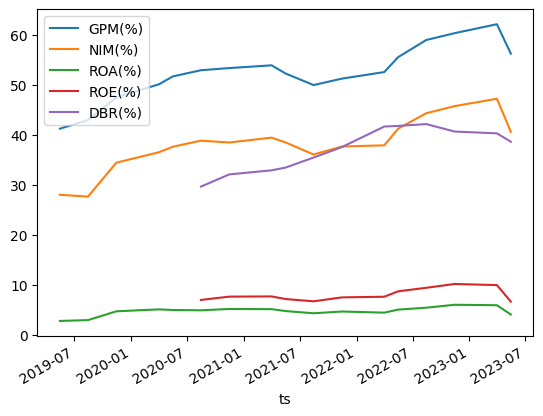

In [28]:
# 台積電獲利能力

df = dataset.his_profits.round(2)
df = dataset.reverse_df_index(df)
df = df.loc['2330'][['GPM(%)', 'NIM(%)', 'ROA(%)' ,'ROE(%)', 'DBR(%)']]
df.plot()

<Axes: >

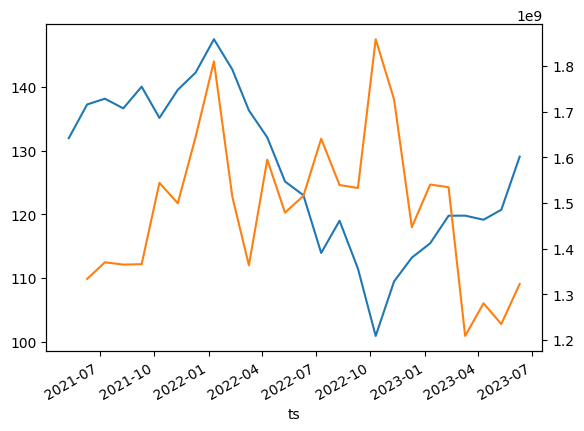

In [5]:
# TW50 股價-營收 趨勢觀察

# connection = util.get_db_proxy().connection
# # dataset.refresh_revenues(connection, datetime.datetime(2021, 5, 1))
# dataset.refresh_prices(connection, datetime.datetime(2021, 5, 1))
# connection.close()

TW50 = [ '台積電', '鴻海', '聯發科', '台達電', '聯電', '中華電', '中信金', '兆豐金', '玉山金', '南亞', '日月光投控', '中鋼', '台塑', '廣達', 
        '中租-KY', '第一金', '合庫金', '聯詠', '和泰車', '台泥', '台化', '大立光', '華南金', '亞德客-KY', '華新', '台塑化', '彰銀', 
        '矽力*-KY', '陽明', '萬海', '豐泰', '南亞科'] + ["元大金", "台灣大", "國泰金", "富邦金", "統一", "統一超", "遠傳", "遠東新", "開發金"]

_revenues = dataset.revenues.reset_index()
_revenues = _revenues[ (_revenues['ts'] > datetime.datetime(2021, 5, 10)) & (_revenues['ts'] < datetime.datetime(2023, 7, 1)) ]
_revenues = dataset.append_stock_info(_revenues).set_index(['name'])
_revenues = _revenues.loc[TW50][['當月營收', 'ts']]
# _revenues.groupby(['ts']).count()
_revenues = _revenues.groupby(['ts']).sum()

_prices = dataset.prices.reset_index()
_prices = _prices[ (_prices['ts'] > datetime.datetime(2021, 5, 10)) & (_prices['ts'] < datetime.datetime(2023, 7, 1)) ]
_prices = dataset.append_stock_info(_prices).set_index(['name'])
_prices = _prices.loc['元大台灣50'][['收盤價', 'ts']]
_prices['ts'] = _prices['ts'].apply(lambda x: datetime.datetime(x.year, x.month, 10))
_prices = _prices.groupby(['ts']).mean()

_prices['收盤價'].plot()
_revenues['當月營收'].plot(secondary_y=True)

# 不易：飛龍在天

In [7]:
dataset.quarter_anal.round(2)

,收盤價,漲跌幅(%),created_ts,updated_ts,本益比,股利年度,殖利率(%),股利連續N年,股價淨值比,每股股利(註),...,NIM(%)+,ROA(%)+,ROE(%)+,DBR(%)+,股本+,資產+,權益+,YoY(%),MoM(%),IsQ3
code,,,,,,,,,,,,,,,,,,,,,
1538,9.50,1.05,2023-06-30 08:02:16,2023-07-02 08:26:23,NaN,111.0,0.00,0,2.95,NaN,...,0.0,-2.84,-5.07,-34.44,419500.0,148151.0,183129.0,-58.44,17037.84,False
2440,11.75,-0.85,2023-06-30 08:02:16,2023-07-02 08:26:23,NaN,111.0,0.00,0,1.20,NaN,...,0.0,-1.06,-1.62,0.59,0.0,-25463.0,-29178.0,12532.20,11192.42,False
2369,15.40,0.00,2023-06-30 08:02:16,2023-06-30 08:02:16,NaN,111.0,1.95,2,1.03,NaN,...,0.0,-1.19,-1.73,-0.60,0.0,-225536.0,-102098.0,-172.49,4796.06,False
2615,59.00,2.88,2023-06-30 08:02:16,2023-07-02 08:26:23,3.29,111.0,8.47,5,0.75,NaN,...,0.0,-0.60,-0.93,-2.29,0.0,-18564988.0,-3556723.0,-105.20,4762.02,False
6153,26.70,1.87,2023-06-30 08:02:16,2023-07-02 08:26:23,NaN,111.0,0.90,1,1.03,NaN,...,0.0,-3.51,-5.82,-0.65,0.0,-1474190.0,-725082.0,493.63,2939.30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1333,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1311,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


# 不易：亢龍有悔